# **Sequential Agent Graph**

In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph 

In [4]:
class AgentState(TypedDict):
    name : str
    age : int
    final : str

In [12]:
def first_node(state: AgentState) -> AgentState:
    state["final"] = f"Hy {state["name"]}!"
    return state

In [19]:
def second_node(state: AgentState) -> AgentState:
    state["final"] = state['final'] + f" You are {state['age']} years old."
    return state

In [ ]:
# build the graph
graph = StateGraph(AgentState) # create a new state graph

# add nodes
graph.add_node("first_node", first_node) # add the first node
graph.add_node("second_node", second_node) # add a second node  

graph.set_entry_point("first_node")  # set the entry point of the graph
graph.add_edge("first_node", "second_node") # add an edge between nodes 
graph.set_finish_point("second_node") # set the finish point of the graph

app = graph.compile() # compile the graph into an app   

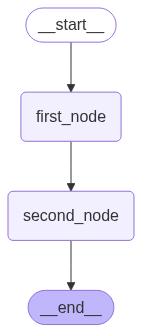

In [21]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"name": "John", "age": 30})


In [23]:
result

{'name': 'John', 'age': 30, 'final': 'Hy John! You are 30 years old.'}

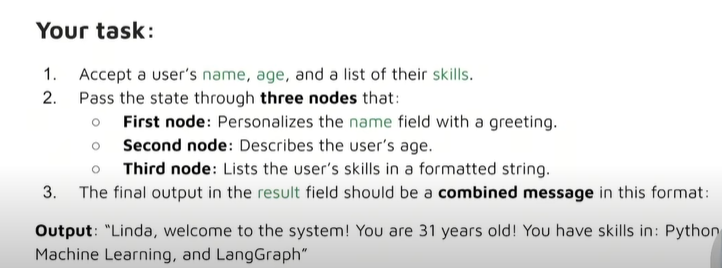

In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph 

In [45]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : list[str]          
    final : str

In [46]:
def first_node(state: AgentState) -> AgentState:
    state["final"] = f"Hy {state["name"]}! Your Welcome"
    return state

In [47]:
def second_node(state: AgentState) -> AgentState:
    state["final"] = state['final'] + f" You are {state['age']} years old."
    return state

In [63]:
def third_node(state : AgentState) -> AgentState:
    state["final"] = state['final'] + f" Your skills are {state['skills']}."
    return state

In [64]:
# build the graph
graph = StateGraph(AgentState) # create a new state graph

# add nodes
graph.add_node("first_node", first_node) # add the first node
graph.add_node("second_node", second_node) # add a second node  
graph.add_node("third_node", third_node) # add a third node

graph.set_entry_point("first_node")  # set the entry point of the graph
graph.add_edge("first_node", "second_node") # add an edge between nodes
graph.add_edge("second_node", "third_node") # add an edge between second and third nodes
 
graph.set_finish_point("third_node") # set the finish point of the graph

app = graph.compile() # compile the graph into an app   

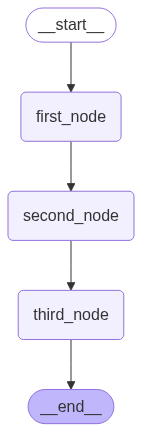

In [65]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [66]:
result = app.invoke({"name": "John", "age": 30, "skills": ["Python", "JavaScript", "SQL"]})


In [67]:
result

{'name': 'John',
 'age': 30,
 'skills': ['Python', 'JavaScript', 'SQL'],
 'final': "Hy John! Your Welcome You are 30 years old. Your skills are ['Python', 'JavaScript', 'SQL']."}

In [68]:
result["final"]

"Hy John! Your Welcome You are 30 years old. Your skills are ['Python', 'JavaScript', 'SQL']."